#### Importing Libraries and Data

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 국립공원 데이터 읽어오기
np_data= pd.read_csv('datasets/national_parks.csv')
np_data.shape

(57, 4)

In [3]:
# np_data라는 df에 연도와 세 국립공원이 열 데이터로 저장되어 있음
np_data.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,833300,1253000,264800
1,1962,1044800,1447400,251000
2,1963,1074000,1539500,289500
3,1964,1079800,1576600,300300
4,1965,1091300,1689200,366800


In [16]:
# np_data라는 df에서 연도 열만 추출해서 x에 저장
x = np_data['Year']
x.tail()

52    2013
53    2014
54    2015
55    2016
56    2017
Name: Year, dtype: int64

In [5]:
# np_data라는 df에서 세 국립공원 열을 행 방향으로 쌓은 형태의 3 행 배열 생성
y = np.vstack([np_data['Badlands'], 
               np_data['GrandCanyon'], 
               np_data['BryceCanyon']])
y

array([[ 833300, 1044800, 1074000, 1079800, 1091300, 1094800, 1188700,
        1194600, 1221300, 1303100, 1282000, 1274600, 1387900, 1205300,
        1153200, 1210100, 1305400, 1234915,  858000,  952652, 1175952,
        1030484, 1026981, 1113675,  950242, 1025630, 1174398, 1110040,
        1237956, 1326475, 1518396, 1205297, 1179458, 1130459, 1075569,
        1024705,  970696, 1021049,  950453, 1105824,  955469,  908898,
         871034,  936030,  909146,  840118,  886654,  845734,  933918,
         977778,  870741,  883406,  892372,  868094,  989354,  996263,
        1054325],
       [1253000, 1447400, 1539500, 1576600, 1689200, 1806000, 1804900,
        1986300, 2192600, 2258200, 2402100, 2698300, 1909700, 1888600,
        2625100, 2791600, 2627200, 2748642, 2131716, 2304973, 2472270,
        2293127, 2248082, 2173584, 2711529, 3035787, 3513030, 3859886,
        3966209, 3776685, 3886031, 4203545, 4575602, 4364316, 4557645,
        4537703, 4791668, 4239682, 4575124, 4460228, 410480

### 누적영역차트 Stack Plots
시간 흐름에 따른 누적영역차트를 작성

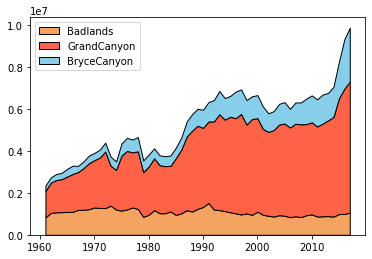

In [6]:
# 각 누적영역에 대한 레이블
labels = ['Badlands', 
          'GrandCanyon', 
          'BryceCanyon']

# 각 누적영역에 대한 색상
colors = ['sandybrown', 
          'tomato', 
          'skyblue']

# plt.stackplot()은 판다스 df.plot.area()와 유사함
plt.stackplot(x,  # 연도를 x 축으로
              y,  # 세 국립공원 데이터가 행으로 쌓여있는 데이터를 y 축으로
              labels=labels,
              colors=colors, 
              edgecolor='black')

# 범례 위치는 upperleft
plt.legend(loc=2)

plt.show()

### 백분율 누적영역차트 Percentage Stacked Area Chart
분포의 백분율로 누적영역차트 작성

   Year  Badlands  GrandCanyon  BryceCanyon
0  1961    833300      1253000       264800
1  1962   1044800      1447400       251000
2  1963   1074000      1539500       289500
3  1964   1079800      1576600       300300
4  1965   1091300      1689200       366800
       Year  Badlands  GrandCanyon  BryceCanyon
0  0.000833  0.354134     0.532498     0.112534
1  0.000715  0.380597     0.527255     0.091434
2  0.000676  0.369712     0.529955     0.099657
3  0.000664  0.364962     0.532876     0.101499
4  0.000624  0.346525     0.536379     0.116472


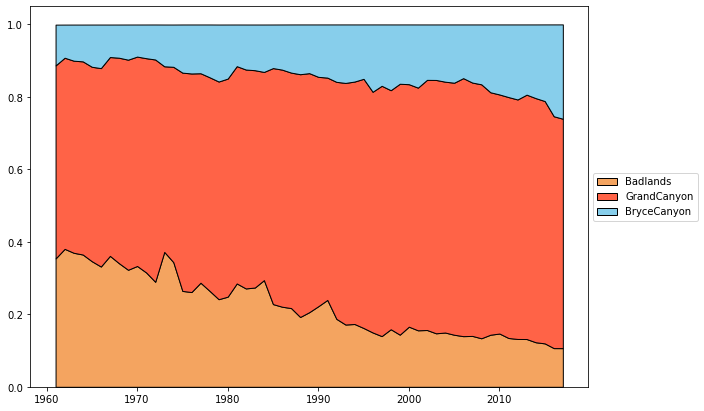

In [7]:
plt.figure(figsize=(10,7))
print(np_data.head())

# df.sum(axis=1): df에서 열 방향으로 행별 합계를 구함
# df.divide(x, axis=0): df에서 행 방향으로 열별 나누기를 수행
data_perc = np_data.divide(np_data.sum(axis=1), axis=0)
print(data_perc.head())

# plt.stackplot()으로 누적영역차트 그리기
plt.stackplot(x,  # 연도를 x 축으로
              data_perc["Badlands"],
              data_perc["GrandCanyon"],
              data_perc["BryceCanyon"],
              edgecolor='black',
              colors=colors,
              labels=labels)

# bbox(bounding box)를 (x, y) 좌표에 고정시키고,
# 범주 박스 기준으로 'center left'에 위치시킴
# https://dailyheumsi.tistory.com/97 참고
plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5)
          )

plt.show()

### 줄기 플롯 Stem Plots
- 누적영역차트와 유사하지만, 음의 수치를 시각화
- 예를 들어서, 시간의 흐름에 따른 데이터의 증감을 시각화

In [8]:
np_stem= np_data.copy()

In [9]:
# df.diff() 메소드로 직전 행과 이번 행의 차이를 계산
np_stem[['Badlands', 'GrandCanyon', 'BryceCanyon']] \
    = np_data[['Badlands', 'GrandCanyon', 'BryceCanyon']].diff()

np_stem.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,NaN,NaN,NaN
1,1962,211500.0,194400.0,-13800.0
2,1963,29200.0,92100.0,38500.0
3,1964,5800.0,37100.0,10800.0
4,1965,11500.0,112600.0,66500.0


In [ ]:
plt.figure(figsize=(15,11))

# title: figure 내부에서 그래프 한 개, 즉 축(axes)에 대한 제목
# suptitle: figure 자체의 제목
# https://kongdols-room.tistory.com/86
plt.suptitle('Change in Number of Visitors', y=0.94)

plt.subplot(311)
plt.stem(np_stem['Year'],
         np_stem['Badlands'],
         markerfmt = 'b_',  # marker는 줄기의 머리에 대한 표식, blue, _
         linefmt = 'r--',   # line은 선에 대한 표식, red, --
         basefmt = 'g:')    # base는 기준 수평선에 대한 표식, green, :(dotted)
plt.title('GrandCanyon')

plt.subplot(312)
plt.stem(np_stem['Year'],
         np_stem['GrandCanyon'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.title('Badlands')

plt.subplot(313)
plt.stem(np_stem['Year'],
         np_stem['BryceCanyon'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.title('BryceCanyon')

plt.show()

# 세 차트의 눈금이 모두 다름

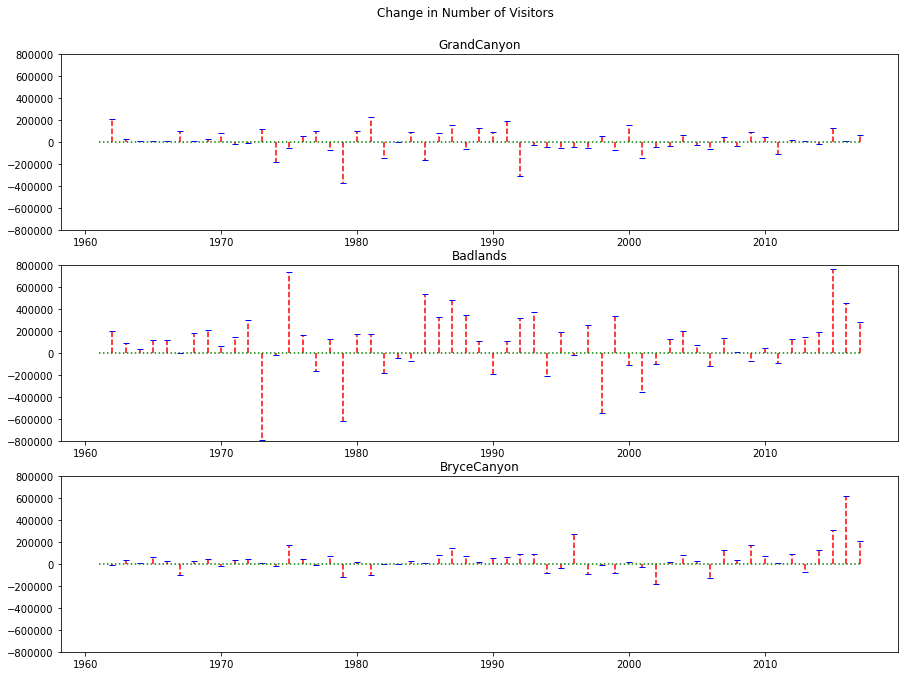

In [20]:
plt.figure(figsize=(15,11))

# title: figure 내부에서 그래프 한 개, 즉 축(axes)에 대한 제목
# suptitle: figure 자체의 제목
# https://kongdols-room.tistory.com/86
plt.suptitle('Change in Number of Visitors', y=0.94)

plt.subplot(311)
plt.stem(np_stem['Year'],
         np_stem['Badlands'],
         markerfmt = 'b_',  # marker는 줄기의 머리에 대한 표식, blue, _
         linefmt = 'r--',   # line은 선에 대한 표식, red, --
         basefmt = 'g:')    # base는 기준 수평선에 대한 표식, green, :(dotted)
plt.ylim(-800000, 800000)
plt.title('GrandCanyon')

plt.subplot(312)
plt.stem(np_stem['Year'],
         np_stem['GrandCanyon'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.ylim(-800000, 800000)
plt.title('Badlands')

plt.subplot(313)
plt.stem(np_stem['Year'],
         np_stem['BryceCanyon'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.ylim(-800000, 800000)
plt.title('BryceCanyon')

plt.show()

# 세 차트의 눈금이 모두 다름